In [1]:
%pwd

'd:\\workbench\\notebook\\Python\\src\\DeepLearning'

In [2]:
!which python

/d/workbench/ve_report_201810/Scripts/python


In [3]:
!pip show tensorflow

Name: tensorflow
Version: 1.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: d:\workbench\ve_report_201810\lib\site-packages
Requires: keras-preprocessing, termcolor, numpy, wheel, six, keras-applications, protobuf, astor, gast, absl-py, grpcio, tensorboard
Required-by: 


In [4]:
#!python -m pipdeptree -p tensorflow,keras

In [5]:
# http://tensorflow.classcat.com/
# http://drumato.hatenablog.com/
# http://www.tdi.co.jp/miso/
# http://docs.fabo.io/tensorflow/model_mnist/createDataset.html
# http://ykubot.com/2017/11/05/tensorflow-keras-monkey-1/
# https://weblabo.oscasierra.net/python/ai-mnist-data-detail.html
# https://ai-cordinator.jp/ros-joystick/
# https://ai-cordinator.jp/mnist/

# https://keras.io/ja/
# https://keras.io/ja/datasets/


In [6]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.12.0


In [7]:
#import urllib.request
#proxy_support = urllib.request.ProxyHandler({'http':'http://Proxys:80','https':'https://Proxys:80'})
#opener = urllib.request.build_opener(proxy_support)
#urllib.request.install_opener(opener)

In [8]:
#from keras.datasets import cifar10
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
#from keras.datasets import cifar100
#(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [10]:
#from keras.datasets import imdb
#(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
#                                                      num_words=None,
#                                                      skip_top=0,
#                                                      maxlen=None,
#                                                      seed=113,
#                                                      start_char=1,
#                                                      oov_char=2,
#                                                      index_from=3)

In [11]:
#from keras.datasets import reuters
#(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
#                                                         num_words=None,
#                                                         skip_top=0,
#                                                         maxlen=None,
#                                                         test_split=0.2,
#                                                         seed=113,
#                                                         start_char=1,
#                                                         oov_char=2,
#                                                         index_from=3)

In [12]:
#from keras.datasets import boston_housing
#(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [13]:
#from keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
#from keras.datasets import fashion_mnist
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [15]:

#data_dir = 'c:/dev/workbench/notebook/Python/src/DeepLearning/data/fashion/'
#data_dir = 'd:/workbench/notebook/Python/src/DeepLearning/data/fashion/'

#from keras.datasets import fashion_mnist
#from tensorflow.examples.tutorials.mnist import input_data

#fashion_mnist = keras.datasets.fashion_mnist
#fashion_mnist = 'c:/dev/workbench/notebook/Python/src/DeepLearning/data/fashion/'
#fashion_mnist = 'd:/workbench/notebook/Python/src/DeepLearning/data/fashion/'

#data_dir = 'c:/dev/workbench/notebook/Python/src/DeepLearning/data/fashion/'

#keras.datasets.fashion_mnist = 'c:/dev/workbench/notebook/Python/src/DeepLearning/data/fashion/'
#keras.datasets.fashion_mnist = 'd:/workbench/notebook/Python/src/DeepLearning/data/fashion/'

print(keras.datasets.fashion_mnist)


<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from 'd:\\workbench\\ve_report_201810\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [16]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data(data_dir)
#(train_images, train_labels), (test_images, test_labels) = tf.input_data.read_data_sets(data_dir, one_hot=True)

Using TensorFlow backend.


In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

In [23]:
# Preprocess the data

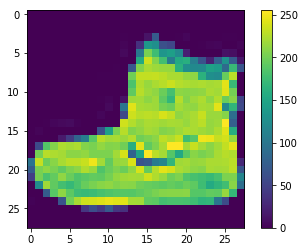

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

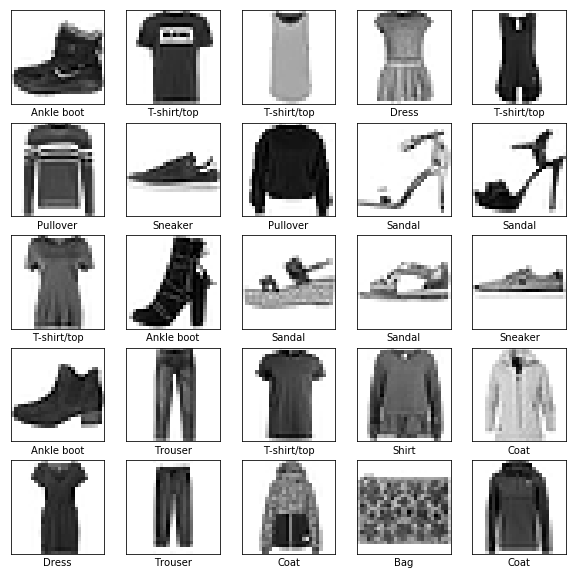

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [27]:
# Build the model

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [29]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Train the model

In [31]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.5017 - acc: 0.8228
Epoch 2/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3728 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3342 - acc: 0.8775
Epoch 4/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.3089 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2936 - acc: 0.8919


In [32]:
# Evaluate accuracy

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 25us/step
Test accuracy: 0.8738


In [34]:
# Make predictions

In [35]:
predictions = model.predict(test_images)

In [36]:
predictions[0]

array([4.7819304e-07, 1.8549929e-09, 7.7739287e-07, 6.2816112e-09,
       1.2735498e-07, 3.4875206e-03, 1.5169475e-06, 4.6903156e-02,
       2.3705968e-06, 9.4960397e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

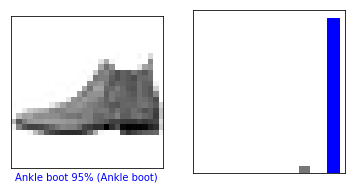

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

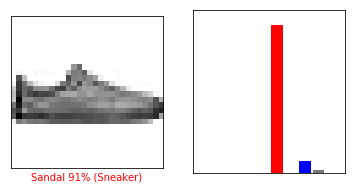

In [41]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

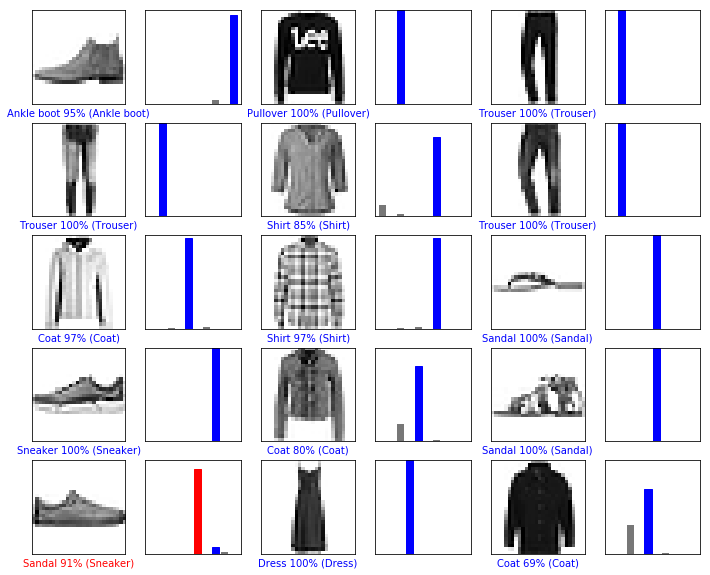

In [42]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [43]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [44]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [45]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.7819344e-07 1.8549999e-09 7.7739287e-07 6.2816232e-09 1.2735509e-07
  3.4875222e-03 1.5169460e-06 4.6903200e-02 2.3705945e-06 9.4960397e-01]]


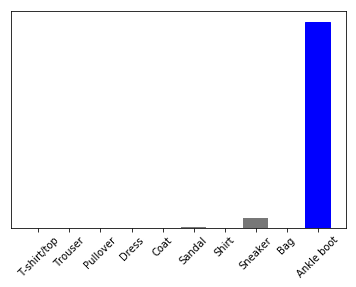

In [46]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
np.argmax(predictions_single[0])

9